In [1]:
import os
from openai import OpenAI
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pprint import pprint
import time
import requests
import os

In [2]:
possible_links = ["https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/hus/gn/v20190903/",
                  "https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/pr/gn/v20190903/",
                  "https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/tas/gn/v20190903/",
                  "https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/CFday/cct/gn/v20190903/"
                  ]

In [3]:
if not os.environ.get("OPENAI_API_KEY"):
    import key
    key.init()
    assert os.environ.get('OPENAI_API_KEY')
    
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

In [4]:
def create_file(path="pr_Amon_GISS-E2-1-G_ssp245_r10i1p1f2_gn_201501-205012.nc"):
    file = client.files.create(
        file=open(path, "rb"),
        purpose='assistants'
    )
    return file


def create_assistant(file):
    assistant = client.beta.assistants.create(
        name="Climate PAL Assistant",
        instructions="You are a climate scientist that is an expert in analyzing and plotting data. When asked a climate science question, write and run code to answer the question. Use the xarray library to read .nc files. Download and use the cftime library to decode time variables",
        tools=[{"type": "code_interpreter"}],
        model="gpt-4o",
        # I need to figure out what this does
        tool_resources={
        "code_interpreter": {
        "file_ids": [file.id]
        }
        }
    )
    return assistant
  
def create_thread(text_body=''):
  thread = client.beta.threads.create()
  message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content = text_body
  )
  print("Here is the message we just created: ", message)
  return thread
  
def create_message(thread, text_body=''):
  message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content = text_body
  )
  print("Here is the message we just created: ", message)
  return message



def download_file(url):
    # Send a HTTP request to the URL
    response = requests.get(url, stream=True)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Extract the filename from the URL
        local_filename = os.path.basename(url)
        
        # Open a local file with write-binary mode
        with open("data/"+local_filename, "wb") as file:
            # Write the contents of the response to the file
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Download completed successfully. File saved as {local_filename}")
    else:
        print("Failed to download the file. Status code:", response.status_code)
        
    return local_filename    

In [8]:
download_file("https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/hus/gn/v20190903/hus_Amon_GISS-E2-1-G_historical_r1i1p1f2_gn_200101-201412.nc")

Download completed successfully. File saved as hus_Amon_GISS-E2-1-G_historical_r1i1p1f2_gn_200101-201412.nc


'hus_Amon_GISS-E2-1-G_historical_r1i1p1f2_gn_200101-201412.nc'

In [5]:
file = create_file()
assistant = create_assistant(file)
thread = create_thread("Create a plot of total rainfall")
create_message(thread, "ignore this sentence, I just want to see how the history works")



Here is the message we just created:  Message(id='msg_F1bplmWBVCZNPRws6Tb3XMLc', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Create a plot of total rainfall'), type='text')], created_at=1721925457, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_Czg28W3OTzCudYJ4e8nxtG9V')
Here is the message we just created:  Message(id='msg_mEjtI8KyAfewFWR5jlrXNySZ', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='ignore this sentence, I just want to see how the history works'), type='text')], created_at=1721925457, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_Czg28W3OTzCudYJ4e8nxtG9V')


Message(id='msg_mEjtI8KyAfewFWR5jlrXNySZ', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='ignore this sentence, I just want to see how the history works'), type='text')], created_at=1721925457, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_Czg28W3OTzCudYJ4e8nxtG9V')

In [6]:
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id
)

In [7]:
run = client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
print(run.status)


in_progress


In [8]:
while run.status not in ["completed", "failed"]:
  run = client.beta.threads.runs.retrieve(
    thread_id = thread.id,
    run_id = run.id
  )

  print(run.status)
  time.sleep(5)

in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
completed


In [9]:
messages = client.beta.threads.messages.list(thread_id=thread.id)
print(messages)

SyncCursorPage[Message](data=[Message(id='msg_YeX9eFYvoVSPpTBcVoTAnPrJ', assistant_id='asst_Acuoy4gsjDdtmEPN8MsqQQUz', attachments=[], completed_at=None, content=[ImageFileContentBlock(image_file=ImageFile(file_id='file-uAqb9otOPMFQhFkGFI0IegMt', detail=None), type='image_file'), TextContentBlock(text=Text(annotations=[], value='Here is the plot of total rainfall across the available time steps. It shows the cumulative rainfall for each latitude and longitude. \n\nIf you have any specific requirements or additional questions related to the data, please let me know!'), type='text')], created_at=1721925571, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_UZHiGMyzGbtiZVQLKs9zG9Oo', status=None, thread_id='thread_Czg28W3OTzCudYJ4e8nxtG9V'), Message(id='msg_eHZQTnxhhELnIpCcyPyuc5uS', assistant_id='asst_Acuoy4gsjDdtmEPN8MsqQQUz', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="It lo

In [10]:
pprint(messages)

SyncCursorPage[Message](data=[Message(id='msg_YeX9eFYvoVSPpTBcVoTAnPrJ', assistant_id='asst_Acuoy4gsjDdtmEPN8MsqQQUz', attachments=[], completed_at=None, content=[ImageFileContentBlock(image_file=ImageFile(file_id='file-uAqb9otOPMFQhFkGFI0IegMt', detail=None), type='image_file'), TextContentBlock(text=Text(annotations=[], value='Here is the plot of total rainfall across the available time steps. It shows the cumulative rainfall for each latitude and longitude. \n\nIf you have any specific requirements or additional questions related to the data, please let me know!'), type='text')], created_at=1721925571, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='assistant', run_id='run_UZHiGMyzGbtiZVQLKs9zG9Oo', status=None, thread_id='thread_Czg28W3OTzCudYJ4e8nxtG9V'), Message(id='msg_eHZQTnxhhELnIpCcyPyuc5uS', assistant_id='asst_Acuoy4gsjDdtmEPN8MsqQQUz', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value="It lo

user: Create a plot of total rainfall
user: ignore this sentence, I just want to see how the history works
assistant: To create a plot of total rainfall from the uploaded data file, I will first inspect the contents of the file to understand its structure and identify the variables it contains. Then, I will extract the necessary data to create the plot.

Let's start by loading the file and examining its contents.
assistant: It looks like the file uses a non-standard calendar type ('365_day') which is causing issues when decoding the time variable. To handle this, I will use the `cftime` library to decode the time variable properly.

Let's proceed by loading the dataset with the appropriate settings to handle the time variable.
assistant: It seems that the `cftime` library is not installed in the current environment. Let's first install the library and then proceed with handling the time variable correctly.
assistant: It appears that the current environment does not have internet access

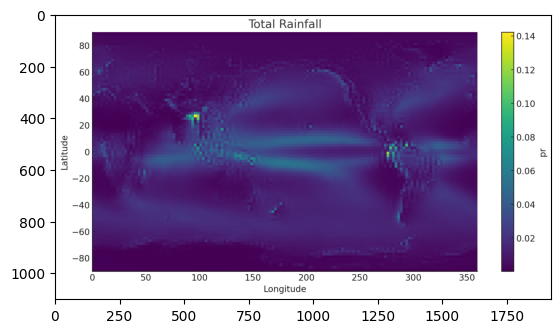

In [11]:
for message in reversed(messages.data):
    content_block = message.content[0]
    
    if hasattr(content_block, 'text'):
        print(message.role + ": " + content_block.text.value)
        
    elif hasattr(content_block, 'image_file'):
        # print(content_block.image_file)
        print(message.role + ": [Non-text content]")
        # print(content_block)
        # print(content_block.image_file.file_id)
        
        api_response = client.files.with_raw_response.retrieve_content(content_block.image_file.file_id)

        content = api_response.content
        with open(f"assistant_images/{content_block.image_file.file_id}.png", 'wb') as f:
            f.write(content)
        
        image_path = f"assistant_images/{content_block.image_file.file_id}.png"

        img = mpimg.imread(image_path)
        plt.imshow(img)
        print('File downloaded successfully.')



In [12]:
response = client.beta.assistants.delete(assistant.id)
print(response)

response = client.files.delete(file)
print(response)

AssistantDeleted(id='asst_WMtCqvsSAdRXoymTW8ODhk2g', deleted=True, object='assistant.deleted')


NotFoundError: Error code: 404 - {'error': {'message': "No such File object: FileObject(id='file-HRuRVNU56PuXGRztQDVw0i5m', bytes=22424788, created_at=1721297692, filename='pr_Amon_GISS-E2-1-G_ssp245_r10i1p1f2_gn_201501-205012.nc', object='file', purpose='assistants', status='processed', status_details=None)", 'type': 'invalid_request_error', 'param': 'id', 'code': None}}

"give a brief description of data and generate as many meaningful plots as you can."

In [7]:
import os
import requests
from bs4 import BeautifulSoup

def download_file(url):
    # Send a HTTP request to the URL
    response = requests.get(url, stream=True)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Extract the filename from the URL
        local_filename = os.path.basename(url)
        
        # Create directory if it does not exist
        if not os.path.exists("data"):
            os.makedirs("data")
        
        # Open a local file with write-binary mode
        with open("data/"+local_filename, "wb") as file:
            # Write the contents of the response to the file
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Download completed successfully. File saved as {local_filename}")
    else:
        print("Failed to download the file. Status code:", response.status_code)
        
    return local_filename

def get_file_links_from_directory(url):
    # Send a HTTP request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all links in the directory
        links = soup.find_all('a')
        
        # Filter out links that are directories
        file_links = [url + link.get('href') for link in links if link.get('href').endswith('.nc')]  # assuming .nc is the file extension
        
        return file_links
    else:
        print("Failed to access the directory. Status code:", response.status_code)
        return []

possible_links = ["https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/hus/gn/v20190903/",
                  "https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/pr/gn/v20190903/",
                  "https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/Amon/tas/gn/v20190903/",
                  "https://portal.nccs.nasa.gov/datashare/giss_cmip6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r1i1p1f2/CFday/cct/gn/v20190903/"
                  ]

for link in possible_links:
    if link.endswith('/'):
        # If the link is a directory, get the files in the directory
        file_links = get_file_links_from_directory(link)
        for file_link in file_links:
            download_file(file_link)
    else:
        download_file(link)


Download completed successfully. File saved as hus_Amon_GISS-E2-1-G_historical_r1i1p1f2_gn_185001-190012.nc
Failed to download the file. Status code: 504


UnboundLocalError: cannot access local variable 'local_filename' where it is not associated with a value